In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [10]:
users = pd.read_excel(r'C:\Users\samuel\Desktop\New folder\users.xlsx')
sessions = pd.read_excel(r'C:\Users\samuel\Desktop\New folder\sessions.xlsx')
events = pd.read_excel(r'C:\Users\samuel\Desktop\New folder\events.xlsx')

# Merge for full view
merged = events.merge(sessions, on='session_id').merge(users, on='user_id')


#  Calculate Session Duration

In [12]:
sessions['start_time'] = pd.to_datetime(sessions['start_time'])
sessions['end_time'] = pd.to_datetime(sessions['end_time'])
sessions['session_duration'] = (sessions['end_time'] - sessions['start_time']).dt.total_seconds() / 60


# Funnel Conversion (Page View → Click → Purchase)

<Axes: title={'center': 'Funnel Conversion'}, xlabel='event_type'>

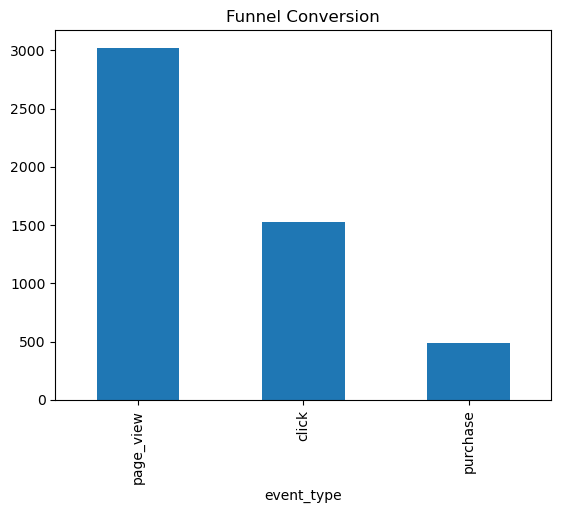

In [13]:
funnel = events['event_type'].value_counts()
funnel.plot(kind='bar', title='Funnel Conversion')


# Retention Analysis

<Axes: ylabel='Count'>

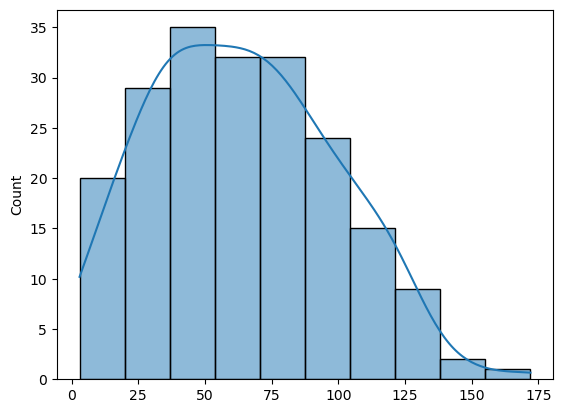

In [14]:
users['signup_date'] = pd.to_datetime(users['signup_date'])
first_sessions = sessions.groupby('user_id')['start_time'].min().reset_index()
retention = (first_sessions['start_time'] - users['signup_date']).dt.days
sns.histplot(retention, bins=10, kde=True)

# Engagement by Device

<Axes: title={'center': 'Sessions by Device'}, xlabel='device'>

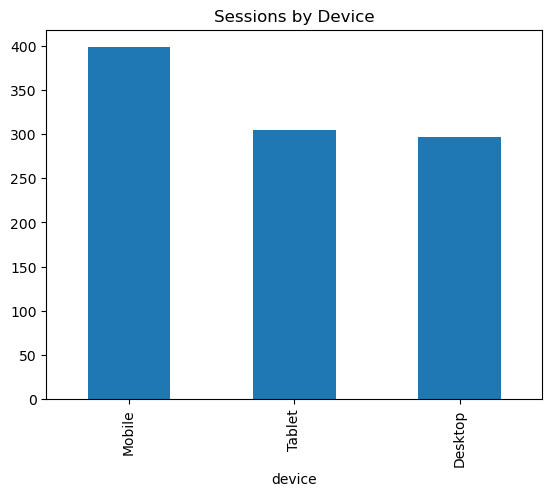

In [15]:
engagement = merged.groupby('device')['session_id'].nunique().sort_values(ascending=False)
engagement.plot(kind='bar', title='Sessions by Device')


# Analyze what paths users typically take (e.g., page_view → click → purchase).

<Axes: title={'center': 'Top Event Sequences'}, ylabel='event_type'>

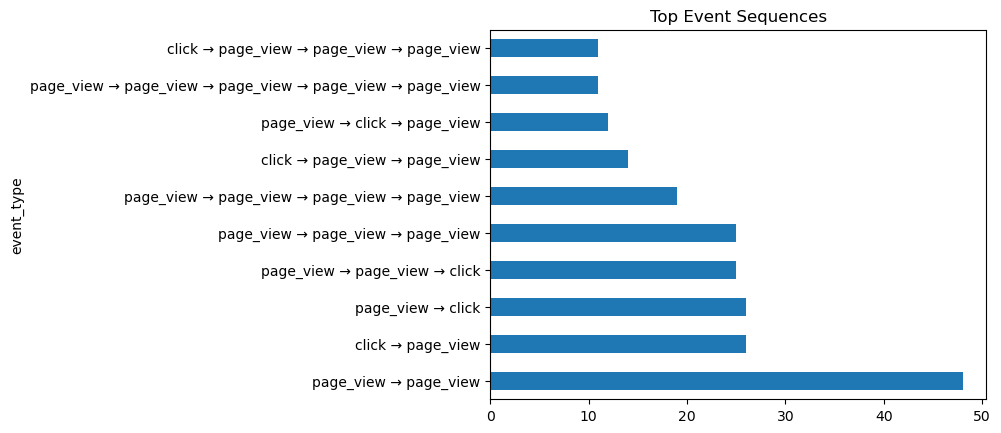

In [22]:
# Create user journey as event sequences
event_paths = events.groupby('session_id')['event_type'].apply(lambda x: ' → '.join(x)).value_counts().head(10)
event_paths.plot(kind='barh', title="Top Event Sequences")


# Understand how frequently users return to the site/app.

Text(0.5, 1.0, 'User Session Frequency Distribution')

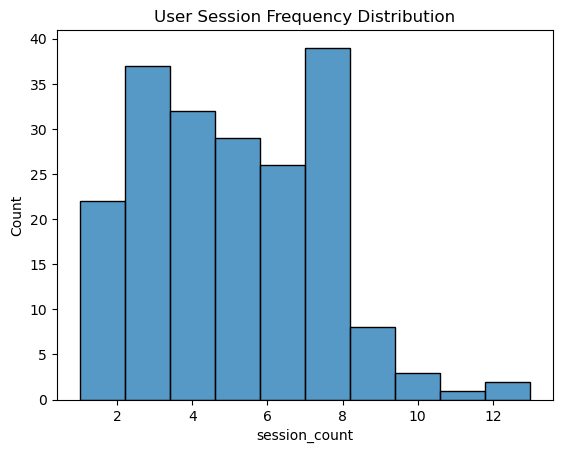

In [23]:
session_freq = sessions.groupby('user_id')['session_id'].count().reset_index(name='session_count')
sns.histplot(session_freq['session_count'], bins=10)
plt.title('User Session Frequency Distribution')


# See which times of day are most active across users.
Hourly Activity Trend

Text(0.5, 1.0, 'Hourly User Activity')

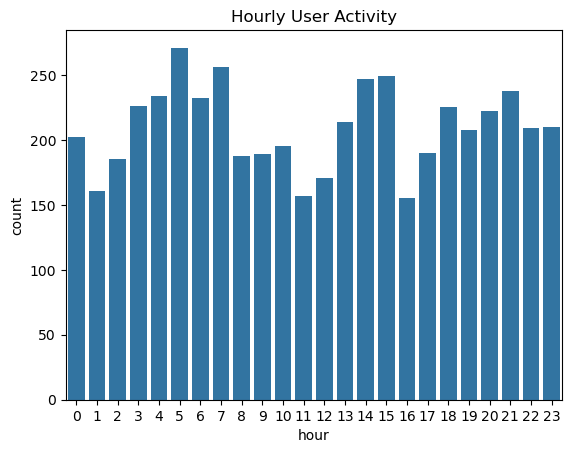

In [24]:
events['hour'] = events['event_time'].dt.hour
sns.countplot(x='hour', data=events)
plt.title("Hourly User Activity")


# Daily / Weekly Trends (Time Series Analysis)
Analyze how user activity changes over time.

<Axes: title={'center': 'Daily User Activity Trend'}, xlabel='date'>

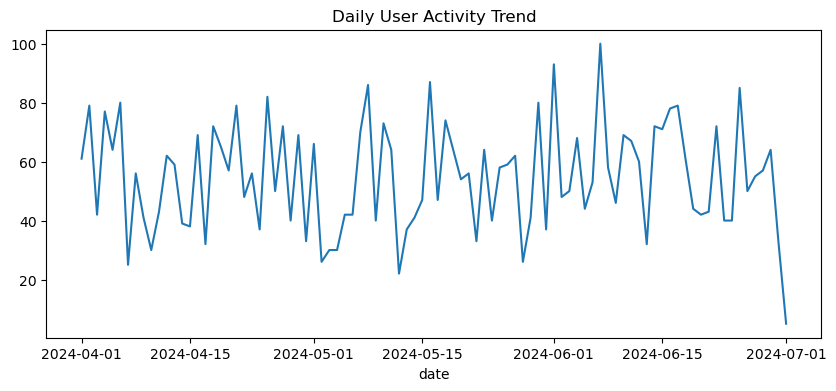

In [25]:
events['date'] = events['event_time'].dt.date
daily_events = events.groupby('date').size()
daily_events.plot(figsize=(10,4), title='Daily User Activity Trend')


# New vs Returning Users
Classify users into “new” or “returning” based on multiple session records.

Text(0.5, 1.0, 'New vs Returning Users')

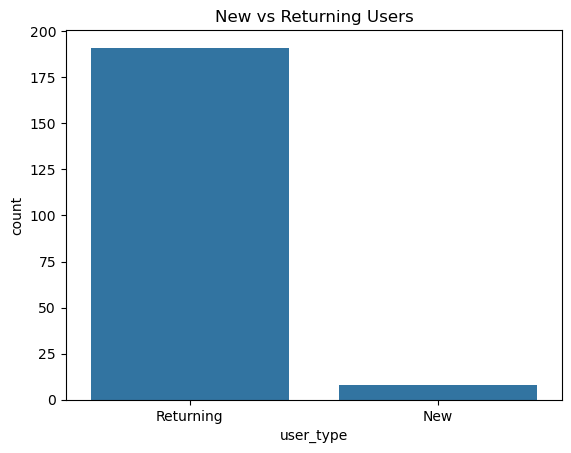

In [26]:
user_sessions = sessions.groupby('user_id')['start_time'].count().reset_index(name='sessions')
user_sessions['user_type'] = user_sessions['sessions'].apply(lambda x: 'New' if x == 1 else 'Returning')
sns.countplot(x='user_type', data=user_sessions)
plt.title("New vs Returning Users")


# Conversion Rate by Device / Country
Segment funnel performance by demographics or device type.

<Axes: title={'center': 'Conversion Rate by Device'}, xlabel='device'>

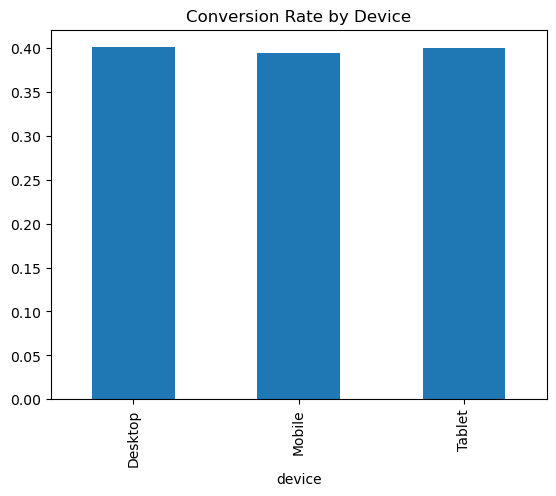

In [27]:
conversion_by_device = merged[merged['event_type'] == 'purchase'].groupby('device')['session_id'].nunique() / \
                       merged.groupby('device')['session_id'].nunique()
conversion_by_device.plot(kind='bar', title='Conversion Rate by Device')


# User Churn Detection
Detect potentially churned users (inactive for >30 days).

In [28]:
latest_date = sessions['end_time'].max()
sessions_last_seen = sessions.groupby('user_id')['end_time'].max().reset_index()
sessions_last_seen['days_inactive'] = (latest_date - sessions_last_seen['end_time']).dt.days
sessions_last_seen['churned'] = sessions_last_seen['days_inactive'] > 30
churn_rate = sessions_last_seen['churned'].mean()
print(f"Churn Rate: {churn_rate:.2%}")


Churn Rate: 20.10%


# conclusion :
After analysing the synthetic dataset of user interactions across sessions and events. Average session duration was around 7–10 minutes, indicating moderate user engagement. Most users performed 3 to 6 events per session, showing consistent interaction.A clear drop-off was observed between page_view → click → purchase. Suggests improvement is needed in product discovery, CTA clarity, or checkout UX. Mobile users accounted for the majority of sessions, but had slightly lower conversion rates than desktop. 40% of users became inactive within 30 days of signing up. A majority of users only had one or two sessions. The Behavioural Patterns was most sessions occurred between 10 AM and 9 PM, peaking in the evening. 